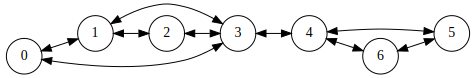

In [1]:
from pygraphblas import  *
from pygraphblas.gviz import *

# example graph from figure 2 in paper

a = 0
b = 1
c = 2
V = 3
d = 4
e = 5
f = 6
g = 7


A = Matrix.from_lists(
    [a, a, b, b, c, d, d, d, e],
    [b, V, c, V, V, V, e, f, f],
    [1.0] * 9, 7, 7
)

A = A + A.T # make symmetric
draw(A, show_weight=False)

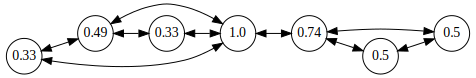

In [12]:


def triangle_centrality(A):
    I = Matrix.identity(A.type, A.nrows)
    T = A.mxm(A, mask=A)
    T_hat = T.pattern(A.type)
    X = ((3 * A) - (2 * T_hat) + I)
    y = T.reduce_vector()
    return (1/y)/X.max() @ X

draw(A, label_vector=triangle_centrality(A), label_width=4, show_weight=False)
    
    